In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Часть I

[Titanic dataset](https://www.kaggle.com/competitions/titanic/overview) — данные о пассажирах титаника

Загрузим данные

In [ ]:
titanic = pd.read_csv('../../data/titanic/train.csv')
titanic.head()

#### Задание 1
Постройте графики распределения возвраста в зависмости от совокупности факторов:
- пол
- выжил или нет

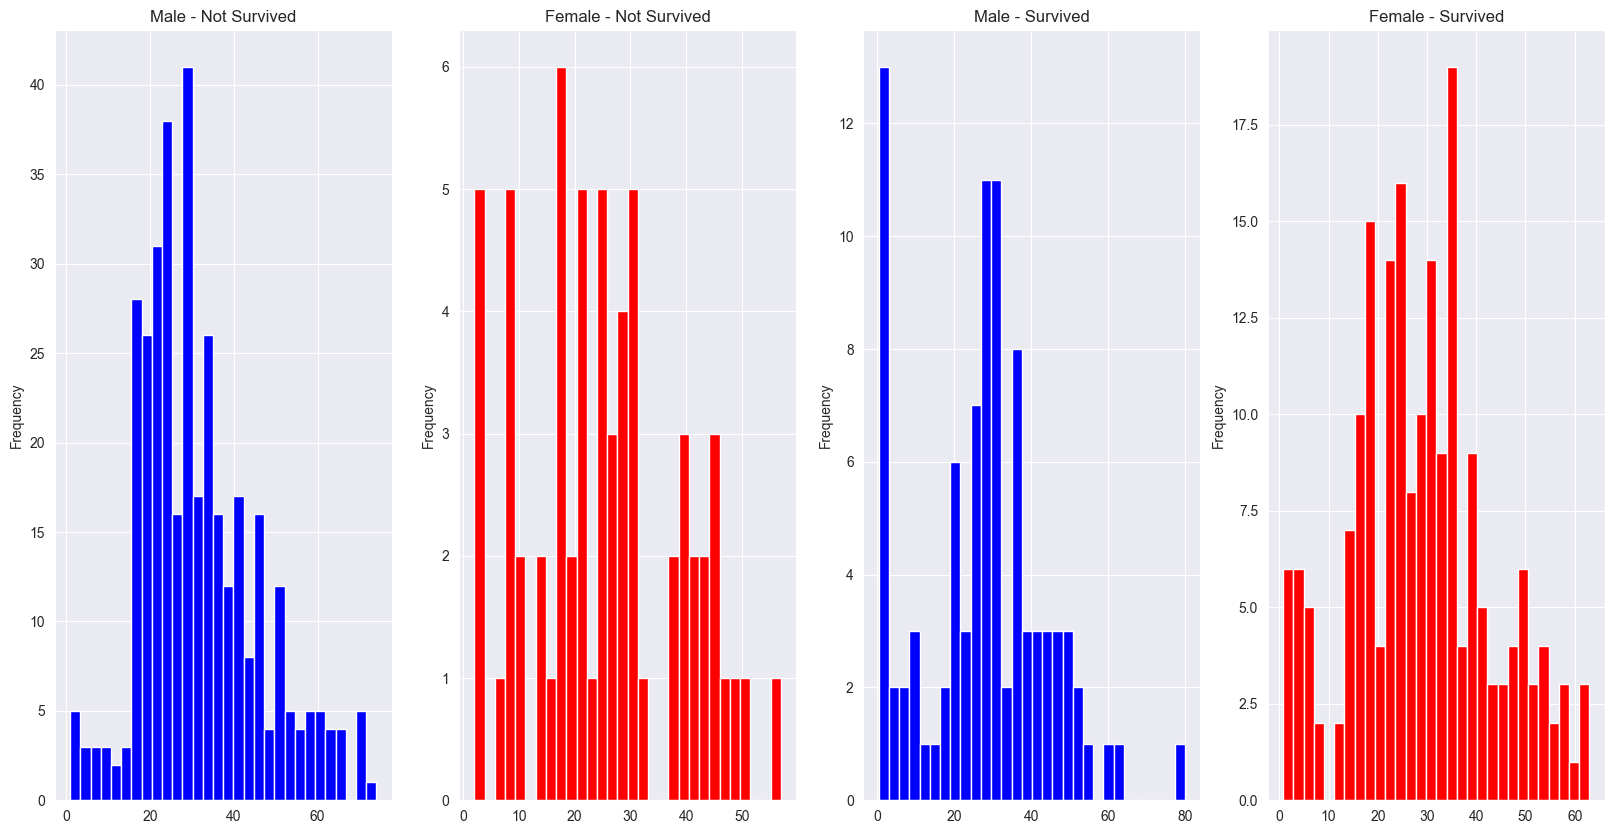

In [11]:
groups = titanic.groupby(['Sex', 'Survived'])

fig, axes = plt.subplots(ncols=4, figsize=(20, 10))

titles = ['Male - Not Survived', 'Female - Not Survived', 'Male - Survived', 'Female - Survived']

for (sex, survived), group in groups:
    hist_num = (0 if sex == 'male' else 1) + (0 if survived == 0 else 2)
    color = 'b' if sex == 'male' else 'r'
    group['Age'].plot(kind='hist', bins=30, ax=axes[hist_num], title=titles[hist_num], color=color)
    
plt.show()

#### Задание 2
Найдите самое популярное женское имя

In [12]:
def get_first_name(full_name):
    name_parts = full_name.split(',')
    if "(" in name_parts[1]: # Если имя в скобочках дано
        first_name = name_parts[1].split("(")[1].split(" ")[0]
    else:
        first_name = name_parts[1].split(" ")[2] # Иначе берём имя не в скобочках (но его может и не быть)
    return first_name.strip(' "')


female = titanic[titanic['Sex'] == 'female']

female_names = female['Name'].apply(get_first_name)

most_popular_female_name = female_names.value_counts().idxmax()

print(f"The most popular female name on the Titanic: {most_popular_female_name}.")

The most popular female name on the Titanic: Anna.


#### Задание 3
Сколько на Титанике было детей?

In [13]:
child_age = 18

child_count = len(titanic[titanic['Age'] < child_age])

print(f"There were {child_count} children on the Titanic.")

There were 113 children on the Titanic.


#### Задание 4
Найдите и подкрепите агрументами такое правило, что
1) все удовлетворяющие ему пассажиры выжили;
2) все удовлетворяющие ему пассажиры погибли.
.
Постарайтесь найти такие правила, чтобы под них попало как можно большее число пассажиров

In [14]:
import seaborn as sns
# Тупой перебор, нормально не успел запрогать((

best_score = 0
worst_score = 0

best_rule = {}
worst_rule = {}

for sex in ['male', 'female']:
    for pclass in range(1, 4):
        for max_age in range(0, 100, 10):
            for min_age in range(0, max_age, 10):
                rule = {"sex": sex, "pclass": pclass, "min_age": min_age, "max_age": max_age}

                filtered_titanic = titanic.loc[(titanic['Sex'] == sex) & 
                                     (titanic['Pclass'] == pclass) & 
                                     (titanic['Age'] >= min_age) & 
                                     (titanic['Age'] <= max_age)]

                survived = filtered_titanic['Survived'].sum()
                total = len(filtered_titanic)
                
                if survived == 0 and total > 0:
                    if total > worst_score:
                        worst_score = total
                        worst_rule = rule

                if 0 < total == survived:
                    if total > best_score:
                        best_score = total
                        best_rule = rule

print(best_rule)
print('Максимальное кол-во выживших при правилах выше:', best_score)
print(worst_rule)
print('Максимальное кол-во погибших при правилах выше:', worst_score)


{'sex': 'female', 'pclass': 1, 'min_age': 30, 'max_age': 40}
Максимальное кол-во выживших при правилах выше: 29
{'sex': 'male', 'pclass': 2, 'min_age': 20, 'max_age': 30}
Максимальное кол-во погибших при правилах выше: 33


### Часть II

In [15]:
data = pd.read_csv('../../data/hw2.csv')

#### Задание 5
Вам необхоидмо составить и обосновать правило, которое идеально классифицирует объекты из таблицы `data`.
Класс примера находится в колонке `label`, а признаки — в колонках `x` и `y`

In [16]:
# Разберусь и доделаю до конца недели!